In [1]:
import time
import numpy as np
import scipy
import emcee
import h5py 
import yaml

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})
%load_ext autoreload
%autoreload 2

import run_chain
import chain
import emulator
import initialize_chain

In [25]:
config = \
"""
---
save_fn: '/home/users/ksf293/emulator/chains/chains_upf_c2h2_fenv_test.h5'
emu:
    statistic: 'upf'
    traintag: '_nonolap'
    testtag: '_mean_test0'
    errtag: '_10hod_test0'
    tag: ''
    log: False
    mean: False

chain:
    multi: True
    param_names: ['f_env']
    nwalkers: 24
    nburn: 100
    nsteps: 500

data:
    cosmo: 2
    hod: 2
"""

In [2]:
def gen_config(config_fn, statistic, cosmo, hod, param_names):
    
    d = \
    {
    'save_fn': f'/home/users/ksf293/emulator/chains/chains_test_stat{statistic}_cosmo{cosmo}_hod{hod}.h5',
    'emu':
        {'statistic': statistic,
        'traintag': '_nonolap',
        'testtag': '_mean_test0',
        'errtag': '_10hod_test0',
        'tag': '',
        'log': False,
        'mean': False},
    'chain':
        {'multi': True,
        'param_names': param_names,
        'nwalkers': 24,
        'nburn': 100,
        'nsteps': 500},
    'data':
        {'cosmo': cosmo,
        'hod': hod}  
    }
    with open(config_fn, 'w') as yaml_file:
        yaml.dump(d, yaml_file, default_flow_style=False)
    return config_fn

In [3]:
statistic = 'upf'
param_names = ['f_env']
truths = []
guesses = []
for hod in range(10):
    config_fn = gen_config(f'../chains/chains_test_hod{hod}.cfg', statistic, 0, hod, param_names)
    chain_fn = initialize_chain.main(config_fn, plaintext=False)
    res = run_chain.run(chain_fn, mode='minimize')
    f = h5py.File(chain_fn, 'r')
    truths.append(f.attrs['true_values'])
    guesses.append(res.x)
    f.close()

Fname /home/users/ksf293/emulator/chains/chains_test_statupf_cosmo0_hod0.h5
y: (9,) [9.196694e-01 5.886990e-01 2.250812e-01 1.271124e-01 4.219620e-02
 1.504440e-02 4.877000e-03 7.556000e-04 1.450000e-04]
Stat: upf
True values:
{'f_env': 0.1879146}
Building emulator
Loading training data
Nparams: 18
Rebuilding emulators
Emulator built
['f_env']
[[-0.23867079]]
[[-0.3598956, 0.3598668]]
      fun: array([[[0.0001327]]])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00252858])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 5
   status: 0
  success: True
        x: array([0.17446713])
resx: [0.17446713]
{'f_env': 0.1879146}
Time: 0.06761504411697387 min
Fname /home/users/ksf293/emulator/chains/chains_test_statupf_cosmo0_hod1.h5
y: (9,) [9.278018e-01 6.332578e-01 2.820368e-01 1.717638e-01 6.885280e-02
 2.971440e-02 1.165580e-02 2.717400e-03 7.330000e-04]
Stat: upf
True values:
{'f_env': 0.102011}
Building emulator
Loading

Text(0, 0.5, 'minimization result')

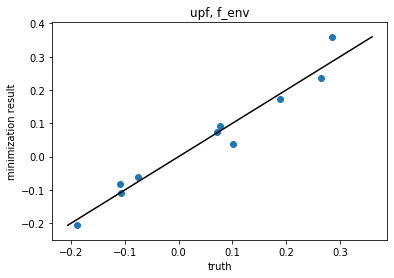

In [4]:
plt.title(f"{statistic}, {' '.join(param_names)}")
plt.scatter(truths, guesses)
one = np.linspace(min(min(truths), min(guesses)), max(max(truths), max(guesses)))
plt.plot(one, one, color='k')
plt.xlabel("truth")
plt.ylabel("minimization result")

In [5]:
wtruths = []
wguesses = []
statistic = 'wp'
param_names = ['f_env']
for hod in range(10):
    config_fn = gen_config(f'../chains/chains_test_hod{hod}.cfg', statistic, 0, hod, param_names)
    chain_fn = initialize_chain.main(config_fn, plaintext=False)
    res = run_chain.run(chain_fn, mode='minimize')
    f = h5py.File(chain_fn, 'r')
    wtruths.append(f.attrs['true_values'])
    wguesses.append(res.x)
    f.close()

Fname /home/users/ksf293/emulator/chains/chains_test_statwp_cosmo0_hod0.h5
y: (9,) [2019.4442     814.5973     321.85       141.2424      80.993416
   46.845388    24.900534    11.507338     3.8443476]
Stat: wp
True values:
{'f_env': 0.1879146}
Building emulator
Loading training data
Nparams: 18
Rebuilding emulators
Emulator built
['f_env']
[[-0.07553666]]
[[-0.3598956, 0.3598668]]
      fun: array([[[17434.28849904]]])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([16.84566087])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 3
   status: 0
  success: True
        x: array([0.05120953])
resx: [0.05120953]
{'f_env': 0.1879146}
Time: 0.015181489785512288 min
Fname /home/users/ksf293/emulator/chains/chains_test_statwp_cosmo0_hod1.h5
y: (9,) [4084.0958   1842.1088    671.14092   222.21638   116.25118    66.047568
   34.18503    14.782274    4.373263]
Stat: wp
True values:
{'f_env': 0.102011}
Building emulator
Loading traini

Text(0, 0.5, 'minimization result')

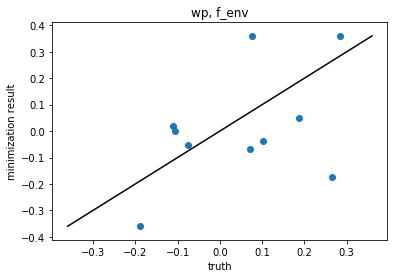

In [6]:
plt.title(f"{statistic}, {' '.join(param_names)}")
plt.scatter(wtruths, wguesses)
one = np.linspace(min(min(wtruths), min(wguesses)), max(max(wtruths), max(wguesses)))
plt.plot(one, one, color='k')
plt.xlabel("truth")
plt.ylabel("minimization result")